In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv("clean_data.csv")

In [3]:
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,2338,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,89383,1.5,1196923135
1,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53817,3.5,1494842425
2,6013,Kangaroo Jack (2003),Action|Comedy,11708,3.0,1536346194
3,99114,Django Unchained (2012),Action|Drama|Western,37574,4.0,1541713583
4,765,Jack (1996),Comedy|Drama,14955,0.5,1312582808


In [4]:
ratings = pd.DataFrame(movies.groupby("title")["rating"].mean())

In [5]:
ratings["rating_count"] = movies.groupby("title")["rating"].count()

In [6]:
ratings.reset_index(inplace = True)

In [7]:
ratings.rename(columns = {"rating" : "rating_mean"}, inplace = True)

In [8]:
ratings.head()

,title,rating_mean,rating_count
0,$5 a Day (2008),4.50,1
1,'71 (2014),2.50,5
2,'Hellboy': The Seeds of Creation (2004),2.00,2
3,'Round Midnight (1986),3.25,2
4,'Salem's Lot (2004),3.00,3


In [9]:
ratings.sort_values("rating_count", ascending = False).head(10)

,title,rating_mean,rating_count
9771,Pulp Fiction (1994),4.149767,858
10824,"Shawshank Redemption, The (1994)",4.403012,830
4500,Forrest Gump (1994),4.056985,816
7809,"Matrix, The (1999)",4.158288,736
10943,"Silence of the Lambs, The (1991)",4.195918,735
11399,Star Wars: Episode IV - A New Hope (1977),4.145427,667
6580,Jurassic Park (1993),3.614217,626
10580,Schindler's List (1993),4.224638,621
4269,Fight Club (1999),4.240464,603
12980,Toy Story (1995),3.926396,591


<Figure size 720x432 with 0 Axes>

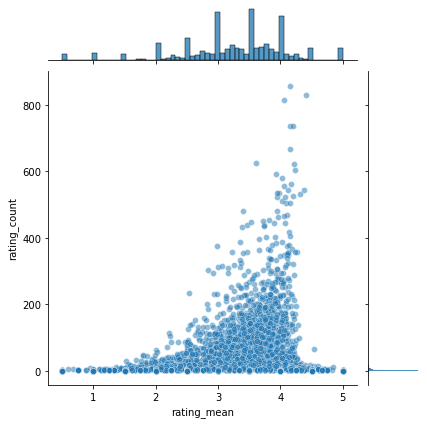

In [10]:
plt.figure(figsize = (10,6))
sns.jointplot(x = "rating_mean", y = "rating_count", data = ratings, alpha = 0.5)
plt.show()

In [11]:
ratings["rating_count"].describe()

count    14274.000000
mean        17.514362
std         48.176069
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max        858.000000
Name: rating_count, dtype: float64

In [12]:
movie_pvt = movies.pivot_table(index = "userId", columns = "title", values = "rating")

In [13]:
movie_pvt.head()

title,$5 a Day (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,¡Three Amigos! (1986),¡Vivan las Antipodas! (2011),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Кентервильское привидение (1970),Кикос (1979),Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pulpfiction_ratings = movie_pvt["Pulp Fiction (1994)"]

In [15]:
pulpfiction_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Pulp Fiction (1994), dtype: float64

In [16]:
similar_to_pulpfiction = movie_pvt.corrwith(pulpfiction_ratings)

In [17]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction, columns = ["correlation"])
corr_pulpfiction.dropna(inplace = True)

In [18]:
corr_pulpfiction.reset_index(inplace = True)

In [19]:
corr_pulpfiction = corr_pulpfiction.join(ratings["rating_count"])
corr_pulpfiction.dropna(inplace = True)

In [20]:
corr_pulpfiction.head()

,title,correlation,rating_count
0,12 Years a Slave (2013),-1.000000,1
1,About Schmidt (2002),-0.755929,5
2,Ace Ventura: Pet Detective (1994),-0.188982,2
3,"African Queen, The (1951)",0.441261,2
4,Aladdin (1992),0.915249,3


In [21]:
corr_pulpfiction[(corr_pulpfiction["rating_count"]>100) & (corr_pulpfiction["correlation"]>0)].sort_values("correlation", ascending = False)

,title,correlation,rating_count
21,Back to the Future Part III (1990),1.000000,126
38,Chocolat (2000),0.944911,171
138,"Lock, Stock & Two Smoking Barrels (1998)",0.912871,185
155,Moon (2009),0.838628,154
